<a href="https://colab.research.google.com/github/varshinisomineni/TASK-1/blob/main/TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from google.colab import files
import io


In [4]:
print("📤 Please upload your dataset file (e.g., Titanic-Dataset.csv)")
uploaded = files.upload()


📤 Please upload your dataset file (e.g., Titanic-Dataset.csv)


Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


In [5]:
filename = list(uploaded.keys())[0]   # dynamically pick uploaded file
df = pd.read_csv(io.BytesIO(uploaded[filename]))
print(f"✅ Dataset '{filename}' loaded successfully!")
print("Shape:", df.shape)
print(df.head())
print(df.info())


✅ Dataset 'Titanic-Dataset (1).csv' loaded successfully!
Shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.100

In [6]:
print("\nMissing values before cleaning:\n", df.isnull().sum())

# Fill Age with median
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode (if column exists)
if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (if column exists)
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)

print("\nMissing values after cleaning:\n", df.isnull().sum())



Missing values before cleaning:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/tmp/ipython-input-816042030.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-816042030.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [7]:
# Encode Sex (if column exists)
if 'Sex' in df.columns:
    df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# One-hot encode Embarked (if column exists)
if 'Embarked' in df.columns:
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

print("\nEncoded columns preview:\n", df.head())



Encoded columns preview:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000       False        T

In [8]:
scaler = StandardScaler()

# Scale Age and Fare only if they exist
cols_to_scale = [col for col in ['Age', 'Fare'] if col in df.columns]
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print("\nAfter scaling:\n", df[cols_to_scale].head())



After scaling:
         Age      Fare
0 -0.565736 -0.502445
1  0.663861  0.786845
2 -0.258337 -0.488854
3  0.433312  0.420730
4  0.433312 -0.486337


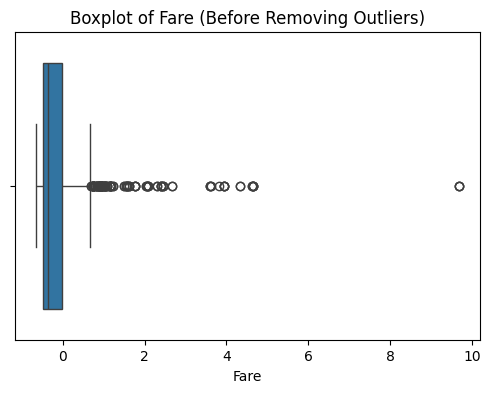

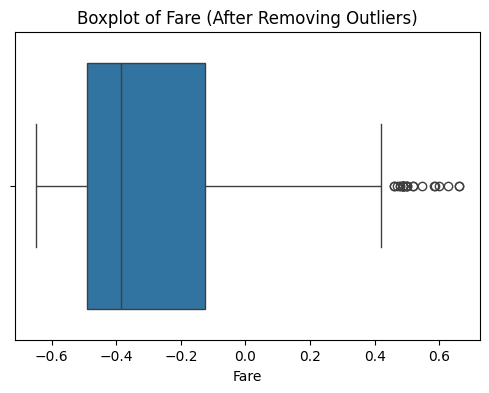

Final dataset shape: (775, 12)


In [9]:
if 'Fare' in df.columns:
    # Boxplot before removing outliers
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df['Fare'])
    plt.title("Boxplot of Fare (Before Removing Outliers)")
    plt.show()

    # Remove outliers using IQR
    Q1 = df['Fare'].quantile(0.25)
    Q3 = df['Fare'].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df['Fare'] >= Q1 - 1.5*IQR) & (df['Fare'] <= Q3 + 1.5*IQR)]

    # Boxplot after removing outliers
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df['Fare'])
    plt.title("Boxplot of Fare (After Removing Outliers)")
    plt.show()

print("Final dataset shape:", df.shape)


In [10]:
df.to_csv("cleaned_titanic.csv", index=False)
print("✅ Cleaned dataset saved as 'cleaned_titanic.csv'")

files.download("cleaned_titanic.csv")


✅ Cleaned dataset saved as 'cleaned_titanic.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>